In [112]:
import pandas as pd

# Cargar los archivos
strong = pd.read_csv("strong.csv")
weightlifting = pd.read_csv("weightlifting_721_workouts.csv")

In [113]:
strong['Date'] = pd.to_datetime(strong['Date'])
weightlifting['Date'] = pd.to_datetime(weightlifting['Date'])

In [114]:
# Aplicamos la conversión solo al dataset en libras
weightlifting['Weight'] = weightlifting['Weight'] * 0.453592

In [115]:
# Dataset con RPE
strong = strong.rename(columns={
    'Date': 'fecha',
    'Exercise Name': 'ejercicio',
    'Weight': 'peso (kg)',
    'Reps': 'reps',
    'RPE': 'RPE'
})
strong = strong[['fecha', 'ejercicio', 'peso (kg)', 'reps', 'RPE']]

# Dataset sin RPE
weightlifting = weightlifting.rename(columns={
    'Date': 'fecha',
    'Exercise Name': 'ejercicio',
    'Weight': 'peso (kg)',
    'Reps': 'reps'
})
weightlifting = weightlifting[['fecha', 'ejercicio', 'peso (kg)', 'reps']]


In [116]:
strong['RIR'] = 10 - strong['RPE']

In [117]:
weightlifting['RIR'] = None  # o np.nan si prefieres

In [118]:
def cumple_objetivo(row):
    if pd.notnull(row['RIR']):
        return row['reps'] >= 5 and row['RIR'] >= 2
    else:
        return row['reps'] >= 5

In [119]:
df['cumplió_objetivo'] = df.apply(cumple_objetivo, axis=1)

In [120]:
df.head()

,fecha,ejercicio,peso (kg),reps,RPE,RIR,cumplió_objetivo
0,2021-09-13 10:41:41,Bench Press (Barbell),35.0,10,9.0,1.0,False
1,2021-09-13 10:41:41,Bench Press (Barbell),35.0,9,10.0,0.0,False
2,2021-09-13 10:41:41,Bench Press (Barbell),35.0,8,10.0,0.0,False
3,2021-09-13 10:41:41,Bench Press (Barbell),35.0,7,10.0,0.0,False
4,2021-09-13 10:41:41,Incline Cable Chest Fly,12.5,12,9.5,0.5,False


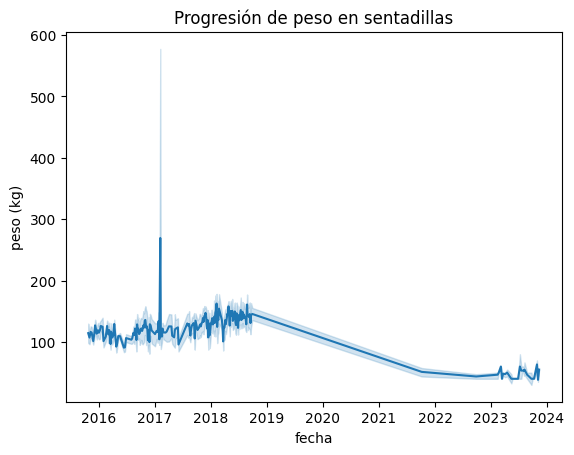

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

# Evolución de la carga en sentadillas
sentadillas = df[df['ejercicio'].str.contains('squat', case=False)]
sns.lineplot(data=sentadillas, x='fecha', y='peso (kg)')
plt.title("Progresión de peso en sentadillas")
plt.show()


In [122]:
import pandas as pd

# Cargar el dataset
df_weightlifting = pd.read_csv("weightlifting_721_workouts.csv")

# Eliminar columnas
df_weightlifting = df_weightlifting.drop(['Workout Name', 'Distance', 'Seconds', 'Notes', 'Workout Notes'], axis=1)

# Pasar peso de libras a kilos
df_weightlifting['Weight'] = df_weightlifting['Weight'] * 0.453592

# Renombrar las columnas
df_weightlifting = df_weightlifting.rename(columns={
    "Date": "fecha",
    "Exercise Name": "ejercicio",
    "Set Order": "set",
    "Weight": "peso (kg)",
    "Reps": "reps"
})

# Agregar las columnas faltantes con valores por defecto
df_weightlifting["rpe"] = None
df_weightlifting["rir"] = None
df_weightlifting["cumplió_objetivo"] = None

# Verificar los cambios
print(df_weightlifting.head())

                 fecha                      ejercicio  set  peso (kg)  reps  \
0  2015-10-23 17:06:37  Incline Bench Press (Barbell)    1   61.23492     8   
1  2015-10-23 17:06:37  Incline Bench Press (Barbell)    2   61.23492     8   
2  2015-10-23 17:06:37  Incline Bench Press (Barbell)    3   61.23492     5   
3  2015-10-23 17:06:37  Incline Bench Press (Barbell)    4   83.91452     7   
4  2015-10-23 17:06:37  Incline Bench Press (Barbell)    5  104.32616     8   

    rpe   rir cumplió_objetivo  
0  None  None             None  
1  None  None             None  
2  None  None             None  
3  None  None             None  
4  None  None             None  


In [123]:
df_weightlifting["fecha"] = pd.to_datetime(df_weightlifting["fecha"], errors='coerce')


In [124]:
df_weightlifting.head()

,fecha,ejercicio,set,peso (kg),reps,rpe,rir,cumplió_objetivo
0,2015-10-23 17:06:37,Incline Bench Press (Barbell),1,61.23492,8,None,None,None
1,2015-10-23 17:06:37,Incline Bench Press (Barbell),2,61.23492,8,None,None,None
2,2015-10-23 17:06:37,Incline Bench Press (Barbell),3,61.23492,5,None,None,None
3,2015-10-23 17:06:37,Incline Bench Press (Barbell),4,83.91452,7,None,None,None
4,2015-10-23 17:06:37,Incline Bench Press (Barbell),5,104.32616,8,None,None,None


In [125]:
df_strong = df

In [126]:
df_strong.head()

,fecha,ejercicio,peso (kg),reps,RPE,RIR,cumplió_objetivo
0,2021-09-13 10:41:41,Bench Press (Barbell),35.0,10,9.0,1.0,False
1,2021-09-13 10:41:41,Bench Press (Barbell),35.0,9,10.0,0.0,False
2,2021-09-13 10:41:41,Bench Press (Barbell),35.0,8,10.0,0.0,False
3,2021-09-13 10:41:41,Bench Press (Barbell),35.0,7,10.0,0.0,False
4,2021-09-13 10:41:41,Incline Cable Chest Fly,12.5,12,9.5,0.5,False


In [127]:
# Convertir 'ejercicio' a categoría
df_weightlifting["ejercicio"] = df_weightlifting["ejercicio"].astype("category")

# Convertir 'rpe' y 'rir' a float y rellenar con NaN
df_weightlifting["rpe"] = pd.to_numeric(df_weightlifting["rpe"], errors='coerce')
df_weightlifting["rir"] = pd.to_numeric(df_weightlifting["rir"], errors='coerce')

# Convertir 'cumplió_objetivo' a booleano. Rellenamos inicialmente con False.
df_weightlifting["cumplió_objetivo"] = False

# Verificar los cambios
print(df_weightlifting.info())
print(df_weightlifting.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9932 entries, 0 to 9931
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fecha             9932 non-null   datetime64[ns]
 1   ejercicio         9932 non-null   category      
 2   set               9932 non-null   int64         
 3   peso (kg)         9932 non-null   float64       
 4   reps              9932 non-null   int64         
 5   rpe               0 non-null      float64       
 6   rir               0 non-null      float64       
 7   cumplió_objetivo  9932 non-null   bool          
dtypes: bool(1), category(1), datetime64[ns](1), float64(3), int64(2)
memory usage: 487.8 KB
None
                fecha                      ejercicio  set  peso (kg)  reps  \
0 2015-10-23 17:06:37  Incline Bench Press (Barbell)    1   61.23492     8   
1 2015-10-23 17:06:37  Incline Bench Press (Barbell)    2   61.23492     8   
2 2015-10-23 17:06:37 

In [128]:
print(df_strong.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13921 entries, 0 to 13920
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fecha             13921 non-null  datetime64[ns]
 1   ejercicio         13921 non-null  object        
 2   peso (kg)         13921 non-null  float64       
 3   reps              13921 non-null  int64         
 4   RPE               3767 non-null   float64       
 5   RIR               3767 non-null   float64       
 6   cumplió_objetivo  13921 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 666.3+ KB
None


In [129]:
# Carga el dataset original Strong
df_strong = pd.read_csv("strong.csv")

# Verifica las columnas presentes
print(df_strong.columns)


Index(['Date', 'Workout Name', 'Duration', 'Exercise Name', 'Set Order',
       'Weight', 'Reps', 'Distance', 'Seconds', 'Notes', 'Workout Notes',
       'RPE'],
      dtype='object')


In [130]:
# Reintegra la columna 'Set Order'
df_strong["set"] = df_strong["Set Order"]
df_strong = df_strong.drop(columns=["Set Order"])  # Si no necesitas la original

In [131]:
# Crear la columna usuario
df_strong['usuario'] = 'usuario_strong'
df_weightlifting['usuario'] = 'usuario_weightlifting'

In [132]:
df_strong.head()

,Date,Workout Name,Duration,Exercise Name,Weight,Reps,Distance,Seconds,Notes,Workout Notes,RPE,set,usuario
0,2021-09-13 10:41:41,PUSH 1,1h 12m,Bench Press (Barbell),35.0,10,0,0,NaN,"Focusing on CHEST, SHOULDERS and TRICEPS",9.0,1,usuario_strong
1,2021-09-13 10:41:41,PUSH 1,1h 12m,Bench Press (Barbell),35.0,9,0,0,NaN,NaN,10.0,2,usuario_strong
2,2021-09-13 10:41:41,PUSH 1,1h 12m,Bench Press (Barbell),35.0,8,0,0,NaN,NaN,10.0,3,usuario_strong
3,2021-09-13 10:41:41,PUSH 1,1h 12m,Bench Press (Barbell),35.0,7,0,0,NaN,NaN,10.0,4,usuario_strong
4,2021-09-13 10:41:41,PUSH 1,1h 12m,Incline Cable Chest Fly,12.5,12,0,0,NaN,NaN,9.5,1,usuario_strong


In [133]:
df_weightlifting.head()

,fecha,ejercicio,set,peso (kg),reps,rpe,rir,cumplió_objetivo,usuario
0,2015-10-23 17:06:37,Incline Bench Press (Barbell),1,61.23492,8,NaN,NaN,False,usuario_weightlifting
1,2015-10-23 17:06:37,Incline Bench Press (Barbell),2,61.23492,8,NaN,NaN,False,usuario_weightlifting
2,2015-10-23 17:06:37,Incline Bench Press (Barbell),3,61.23492,5,NaN,NaN,False,usuario_weightlifting
3,2015-10-23 17:06:37,Incline Bench Press (Barbell),4,83.91452,7,NaN,NaN,False,usuario_weightlifting
4,2015-10-23 17:06:37,Incline Bench Press (Barbell),5,104.32616,8,NaN,NaN,False,usuario_weightlifting


In [134]:
df_sintetico = pd.read_csv('datos_sinteticos.csv')
df_sintetico.head()

,usuario,fecha,ejercicio,set,peso (kg),reps,rpe,rir,cumplió_objetivo
0,intermedio_1,2025-01-01,peso muerto,1,112.8,5,6.6,3.4,False
1,intermedio_1,2025-01-01,peso muerto,2,113.9,7,6.9,3.1,True
2,intermedio_1,2025-01-01,peso muerto,3,115.1,8,7.6,2.4,True
3,intermedio_1,2025-01-01,peso muerto,4,116.2,8,6.7,3.3,True
4,intermedio_1,2025-01-01,peso muerto,5,117.4,6,8.2,1.8,False


In [135]:
df_sintetico['fecha'] = pd.to_datetime(df_sintetico['fecha'], errors='coerce')
df_sintetico['ejercicio'] = df_sintetico['ejercicio'].astype('category')

In [136]:
df_sintetico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4093 entries, 0 to 4092
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   usuario           4093 non-null   object        
 1   fecha             4093 non-null   datetime64[ns]
 2   ejercicio         4093 non-null   category      
 3   set               4093 non-null   int64         
 4   peso (kg)         4093 non-null   float64       
 5   reps              4093 non-null   int64         
 6   rpe               4093 non-null   float64       
 7   rir               4093 non-null   float64       
 8   cumplió_objetivo  4093 non-null   bool          
dtypes: bool(1), category(1), datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 232.2+ KB


In [137]:
df_sintetico.describe()

,fecha,set,peso (kg),reps,rpe,rir
count,4093,4093.000000,4093.000000,4093.000000,4093.000000,4093.000000
mean,2025-02-14 16:21:55.807475968,2.587589,82.644051,7.491327,8.150892,1.849108
min,2025-01-01 00:00:00,1.000000,0.000000,5.000000,6.000000,0.000000
25%,2025-01-23 00:00:00,2.000000,43.300000,6.000000,7.500000,1.200000
50%,2025-02-15 00:00:00,3.000000,67.500000,7.000000,8.200000,1.800000
75%,2025-03-09 00:00:00,4.000000,119.800000,9.000000,8.800000,2.500000
max,2025-03-31 00:00:00,5.000000,340.200000,10.000000,10.000000,4.000000
std,NaN,1.259747,60.793280,1.712679,0.961127,0.961127


In [138]:
df_sintetico.isnull().sum()

usuario             0
fecha               0
ejercicio           0
set                 0
peso (kg)           0
reps                0
rpe                 0
rir                 0
cumplió_objetivo    0
dtype: int64

In [139]:
df_sintetico['usuario'].str.extract('(novato|intermedio|avanzado)')[0].value_counts()

0
novato        2028
intermedio    1368
avanzado       697
Name: count, dtype: int64

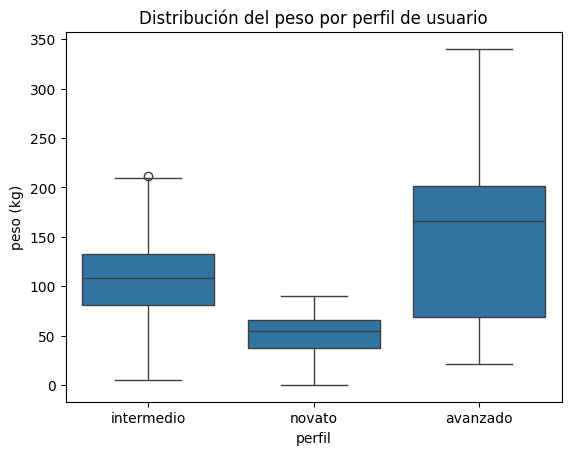

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

df_sintetico['perfil'] = df_sintetico['usuario'].str.extract('(novato|intermedio|avanzado)')[0]
sns.boxplot(data=df_sintetico, x='perfil', y='peso (kg)')
plt.title('Distribución del peso por perfil de usuario')
plt.show()

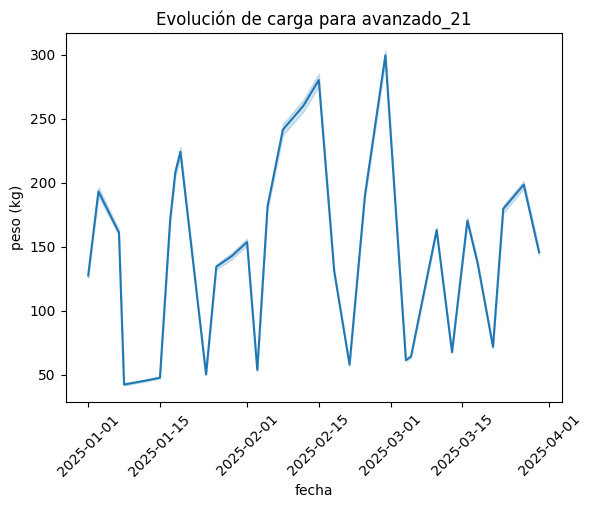

In [141]:
usuario_random = df_sintetico['usuario'].sample(1).values[0]
df_user = df_sintetico[df_sintetico['usuario'] == usuario_random]
sns.lineplot(data=df_user, x='fecha', y='peso (kg)')
plt.title(f'Evolución de carga para {usuario_random}')
plt.xticks(rotation=45)
plt.show()

In [142]:
df_sintetico['cumplió_objetivo'].mean() * 100  # % de cumplimiento


np.float64(29.855851453701444)

In [143]:
print(df_strong.columns)
print(df_weightlifting.columns)
print(df_sintetico.columns)

Index(['Date', 'Workout Name', 'Duration', 'Exercise Name', 'Weight', 'Reps',
       'Distance', 'Seconds', 'Notes', 'Workout Notes', 'RPE', 'set',
       'usuario'],
      dtype='object')
Index(['fecha', 'ejercicio', 'set', 'peso (kg)', 'reps', 'rpe', 'rir',
       'cumplió_objetivo', 'usuario'],
      dtype='object')
Index(['usuario', 'fecha', 'ejercicio', 'set', 'peso (kg)', 'reps', 'rpe',
       'rir', 'cumplió_objetivo', 'perfil'],
      dtype='object')


In [144]:
# 1) Selecciono sólo las columnas que me interesan
df_strong = df_strong[[
    'Date',
    'Exercise Name',
    'set',
    'Weight',
    'Reps',
    'RPE',
    'usuario'    # si ya la añadiste antes
]]

# 2) Renombro al esquema unificado
df_strong = df_strong.rename(columns={
    'Date': 'fecha',
    'Exercise Name': 'ejercicio',
    'set': 'set',
    'Weight': 'peso (kg)',
    'Reps': 'reps',
    'RPE': 'rpe'
})

# 3) Calculo RIR y cumplió_objetivo
df_strong['rir'] = 10 - df_strong['rpe']
df_strong['cumplió_objetivo'] = df_strong['reps'] >= 7

# 4) Reordeno columnas al formato final
df_strong = df_strong[[
    'usuario','fecha','ejercicio','set','peso (kg)',
    'reps','rpe','rir','cumplió_objetivo'
]]

# Compruebo
print(df_strong.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   usuario           3989 non-null   object 
 1   fecha             3989 non-null   object 
 2   ejercicio         3989 non-null   object 
 3   set               3989 non-null   int64  
 4   peso (kg)         3989 non-null   float64
 5   reps              3989 non-null   int64  
 6   rpe               3767 non-null   float64
 7   rir               3767 non-null   float64
 8   cumplió_objetivo  3989 non-null   bool   
dtypes: bool(1), float64(3), int64(2), object(3)
memory usage: 253.3+ KB
None


In [145]:
import pandas as pd

# 1) Fecha a datetime
df_strong['fecha'] = pd.to_datetime(df_strong['fecha'], errors='coerce')
# 2) Ejercicio a category
df_strong['ejercicio'] = df_strong['ejercicio'].astype('category')
# 3) Usuario a category
df_strong['usuario'] = df_strong['usuario'].astype('category')

# Verifica
print(df_strong.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3989 entries, 0 to 3988
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   usuario           3989 non-null   category      
 1   fecha             3989 non-null   datetime64[ns]
 2   ejercicio         3989 non-null   category      
 3   set               3989 non-null   int64         
 4   peso (kg)         3989 non-null   float64       
 5   reps              3989 non-null   int64         
 6   rpe               3767 non-null   float64       
 7   rir               3767 non-null   float64       
 8   cumplió_objetivo  3989 non-null   bool          
dtypes: bool(1), category(2), datetime64[ns](1), float64(3), int64(2)
memory usage: 200.3 KB
None


In [148]:
df_weightlifting['usuario'] = df_weightlifting['usuario'].astype('category')
df_sintetico['usuario'] = df_sintetico['usuario'].astype('category')

In [149]:
print(df_weightlifting.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9932 entries, 0 to 9931
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fecha             9932 non-null   datetime64[ns]
 1   ejercicio         9932 non-null   category      
 2   set               9932 non-null   int64         
 3   peso (kg)         9932 non-null   float64       
 4   reps              9932 non-null   int64         
 5   rpe               0 non-null      float64       
 6   rir               0 non-null      float64       
 7   cumplió_objetivo  9932 non-null   bool          
 8   usuario           9932 non-null   category      
dtypes: bool(1), category(2), datetime64[ns](1), float64(3), int64(2)
memory usage: 497.6 KB
None


In [152]:
df_sintetico.drop(columns=['perfil'], inplace=True)

In [153]:
print(df_sintetico.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4093 entries, 0 to 4092
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   usuario           4093 non-null   category      
 1   fecha             4093 non-null   datetime64[ns]
 2   ejercicio         4093 non-null   category      
 3   set               4093 non-null   int64         
 4   peso (kg)         4093 non-null   float64       
 5   reps              4093 non-null   int64         
 6   rpe               4093 non-null   float64       
 7   rir               4093 non-null   float64       
 8   cumplió_objetivo  4093 non-null   bool          
dtypes: bool(1), category(2), datetime64[ns](1), float64(3), int64(2)
memory usage: 205.5 KB
None


In [154]:
df_total = pd.concat([df_strong, df_weightlifting, df_sintetico],
                     ignore_index=True)
print(df_total.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18014 entries, 0 to 18013
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   usuario           18014 non-null  object        
 1   fecha             18014 non-null  datetime64[ns]
 2   ejercicio         18014 non-null  object        
 3   set               18014 non-null  int64         
 4   peso (kg)         18014 non-null  float64       
 5   reps              18014 non-null  int64         
 6   rpe               7860 non-null   float64       
 7   rir               7860 non-null   float64       
 8   cumplió_objetivo  18014 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 1.1+ MB
None


In [155]:
df_total.to_csv("dataset_combinado.csv", index=False)
